# Machine Learning Model Application on Student Performance


In this Project we are applying a machine learning model to analyze student performance based on various factors like gender, ethnicity, parental education level, lunch, and test preparation courses. 
The libraries that I have imported NumPy,Pandas,matplotlib and Seaborn. Also I have used modelling libraries from sklearn..

This project follows a Machine Learning Lifecycle, which includes:
Understanding the problem statement->
Collecting and checking data->
Performing exploratory data analysis (EDA)->
Preprocessing the data->
Training machine learning models->
Selecting the best-performing model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtplt
import seaborn as sb

In [2]:
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [3]:
df=pd.read_csv("/Users/hansrajkshirsagar/Downloads/StudentsPerformance.csv") #path 

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns=['math score'],axis=1) # segregating the x and y 

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
Y=df["math score"]
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [11]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [12]:
# preprocessing steps for ml pipelining
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_trans = StandardScaler()
oh_tran = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tran, cat_cols),
        ("StandardScaler", num_trans, num_cols),
    ]
)

In [23]:
x = preprocessor.fit_transform(X)

x.shape
# Output: (1000, 19)

# Separating Train and Test for the data:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

# Creating an evaluate function to give all metrics after model training:
# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2 = r2_score(true, predicted)
#     return mae, mse, rmse, r2
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2 

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Dictionary of models
models = {
    "LR": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()
}
model_list = []
r2_list = []

# Iterate over models
for name, model in models.items():  #  Iterate correctly
    model.fit(x_train, y_train)  # Train model

    #predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Store model name
    model_list.append(name) 

    print(f"Model: {name}") 
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print("-" * 40)

    print("Model performance for Test set")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    r2_list.append(model_test_r2) 

    print("=" * 35)
    print("\n")

# Rechecking the models name
print("Model List:", model_list)
print("R2 Scores:", r2_list)


Model: LR
Model performance for Training set
- Root Mean Squared Error: 5.2657
- Mean Absolute Error: 4.1785
- R2 Score: 0.8812
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6404
- Mean Absolute Error: 4.5874
- R2 Score: 0.8514


Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5500
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5967
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967


Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2594
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
----------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6191
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525


Model: KNN
Model performance for Training set
- Root Mean Squared Error: 5.7673
- Mean Absolute Error: 4.5682
- R2 Score: 0.8575
----------

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)  # Sort in descending order


,Model Name,R2_Score
2,Ridge,0.852517
0,LR,0.851395
5,RF,0.799452
1,Lasso,0.796734
3,KNN,0.763004
4,DT,0.655491


In [27]:
print(model_list), len(r2_list)

['LR', 'Lasso', 'Ridge', 'KNN', 'DT', 'RF']


(None, 6)

Accuracy of the model is 85.14


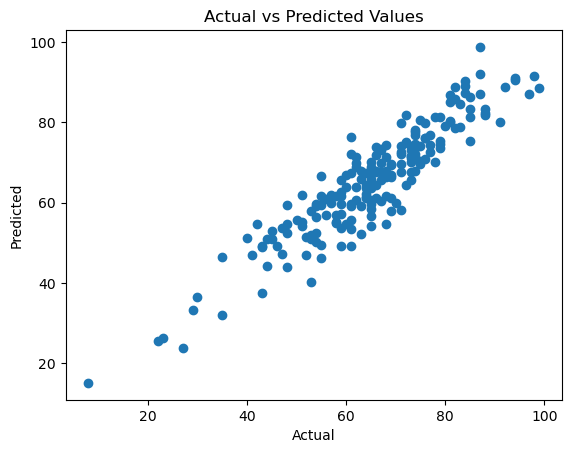

In [31]:
# Train Linear Regression Model
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

# Compute Accuracy
score = lin_model.score(x_test, y_test) * 100  # More direct method
print(f"Accuracy of the model is {score:.2f}")

# Plot y_test vs y_pred
mtplt.scatter(y_test, y_pred)
mtplt.xlabel('Actual')
mtplt.ylabel('Predicted')
mtplt.title('Actual vs Predicted Values')
mtplt.show()


In [33]:
x_test_1d = x_test.ravel() 
y_pred_1d = y_pred.ravel() 
sb.regplot(x=x_test_1d,y=y_pred_1d,ci=None,color='red');

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3800 and the array at index 1 has size 200

In [ ]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_pred:", y_pred.shape)


In [ ]:
x_test_1d = x_test[:, 0]  # Selecting the first feature
y_pred_1d = y_pred.ravel()

sb.regplot(x=x_test_1d, y=y_pred_1d, ci=None, color='red')


<Axes: >

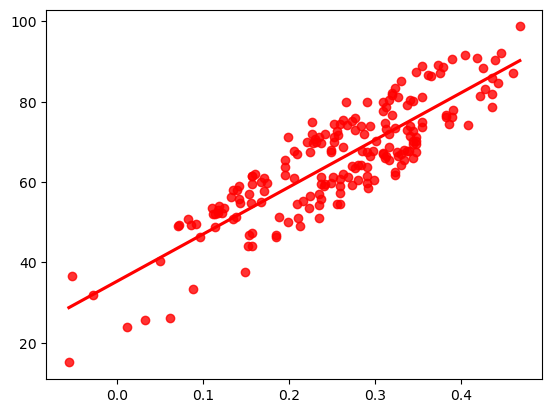

In [37]:
x_test_1d = x_test.mean(axis=1)
y_pred_1d = y_pred.ravel()

sb.regplot(x=x_test_1d, y=y_pred_1d, ci=None, color='red')


<Axes: >

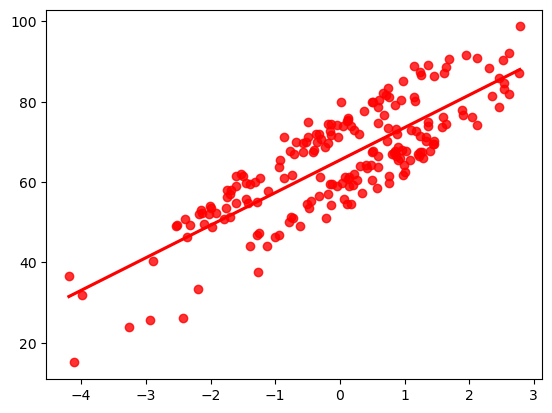

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_test_1d = pca.fit_transform(x_test).ravel()

sb.regplot(x=x_test_1d, y=y_pred, ci=None, color='red')


In [41]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


## Now lets apply Hidden Markov model and use it to predit the future sequence for x_test


In [43]:
import numpy as np
from hmmlearn import hmm

# Ensure x_test is a NumPy array
X = np.array(x_test)  # Shape: (n_samples, n_features)

# Define HMM model with Gaussian emissions
hmm_model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100)

# Fit HMM model to x_test
hmm_model.fit(X)

# Predict hidden states
hidden_states = hmm_model.predict(X)

print("Predicted Hidden States:", hidden_states)

Predicted Hidden States: [1 2 0 0 2 1 0 1 2 0 2 1 0 1 0 0 2 2 1 1 0 1 1 0 0 1 0 0 2 2 2 0 1 0 2 0 2
 0 1 2 0 0 2 0 1 2 0 0 1 1 2 0 0 1 0 2 1 0 0 1 2 2 1 1 0 2 2 0 0 1 0 0 0 2
 0 2 0 2 0 2 2 1 2 0 2 2 1 2 0 0 2 1 2 1 1 0 2 0 2 1 2 0 2 0 0 1 0 1 0 0 0
 1 2 1 2 2 0 0 2 2 2 0 1 0 2 0 1 2 2 2 2 0 0 2 0 0 2 0 2 2 0 2 0 0 0 0 0 2
 2 0 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 2 2 0 0 0 1 0 0 1 0 0 2 2 1 2 1 1 2
 1 0 1 1 0 2 2 2 0 1 0 0 1 2 0]


In [44]:
# Generate future sequence
X_future, _ = hmm_model.sample(n_samples=5)  # Predict next 5 states

print("Generated Future States:", X_future)


Generated Future States: [[ 3.04530082e-02  3.41815717e-01  2.57905927e-01  3.29317225e-01
   1.39193202e+00 -6.91950714e-01  2.62335590e-01 -2.65894617e-01
   3.24524620e-01  7.64721213e-01 -3.03192954e-01  2.68301294e-01
  -5.13315451e-03  3.77109368e-01  6.47757616e-01  9.95358333e-01
  -2.76707007e-02  3.15070531e-01  1.27902274e+00]
 [ 7.35868980e-01  1.79185395e-01  2.59502392e-01  3.89455362e-01
  -2.20305637e-02  8.86927821e-01  2.37333341e-01  1.87918149e-01
   1.25804219e-01  1.16842430e-01  2.14066803e-01  7.26930866e-01
  -2.42832555e-03 -5.96748131e-01 -5.24074910e-01  2.87812216e-03
   9.98636492e-01  1.15443216e+00 -2.49001902e-01]
 [ 7.91593248e-01 -2.85100540e-01  1.16666478e+00 -1.10572701e-01
   4.64498020e-01  4.38884973e-01  9.46331340e-03  1.52335386e-02
   7.03422384e-03  1.23135401e+00 -1.69726451e-02 -3.51557694e-03
   5.56789441e-01  3.79866799e-01  6.77029712e-01  1.08185914e+00
   1.22229688e+00  1.12122222e-01 -5.16012589e-01]
 [ 3.97348451e-01  6.09314930e

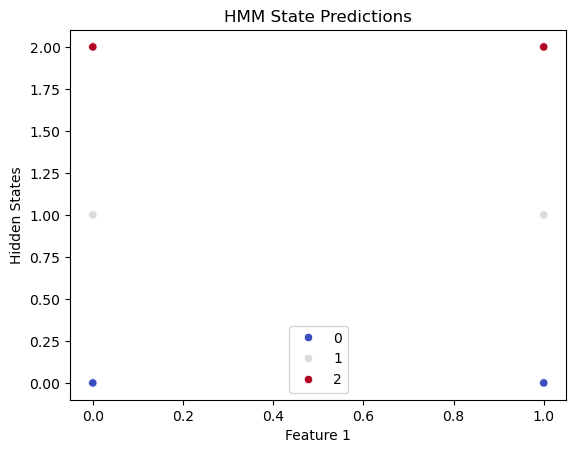

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt

# Plot x_test against predicted hidden states
sb.scatterplot(x=X[:, 0], y=hidden_states, hue=hidden_states, palette="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Hidden States")
plt.title("HMM State Predictions")
plt.show()
